In [88]:
import numpy as np

import matplotlib.pyplot as plt
from numpy import linalg as LA

import os
from scipy.io import loadmat, savemat

In [89]:
save_dir = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data"
out = loadmat(os.path.join(save_dir,'Silverbox_u_upsampled.mat'))
u = out['u']
print(u.shape)

u = u[1000000:2500200]

save_dir = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data"
out = loadmat(os.path.join(save_dir,'Maarten_coeff.mat'))
th = out['thOpt'][0]

(2621440, 1)


In [90]:
def fSimSilverbox(u,x0,th,Ts):

    k1 = th[0]
    k3 = th[1]
    c = th[2]
    d = th[3]
    yOffset = th[4]
    uOffset = th[5]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]+yOffset
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*x2[k]; 
        x2[k+1] = x2[k] + Ts*(-k1*x1[k] -k3*x1[k]**2 -c*x2[k] + d*(u[k] - uOffset))
        y[k+1] = x1[k+1] + yOffset
    
    
    x = [x1,x2]
    return x, y

In [91]:
# def MechTranslation(u, x0, coeff, offset, Ts):
#     k1, k2, k3, m1  = coeff[0], coeff[1], coeff[2], coeff[3]

#     offsetu =  offset[0]
#     offsety =  offset[1]

#     N = u.shape[0]

#     x1  = np.zeros(N)
#     x2  = np.zeros(N)
#     x3  = np.zeros(N)

#     y   = np.zeros(N)

#     x1[0], x2[0], x3[0] = x0
#     y[0]= x3[0] + offsety

#     for k in range(N-1):
#         x1[k+1] = x1[k] + Ts*x2[k]
#         x2[k+1] = x2[k] + Ts*(-((k1+k2)/m)*x1[k] + (k1/m)*x3[k])
#         x3[k+1] = x3[k] + Ts*((k1/b)*x1[k] - (k1/b)*x3[k] + k3*(u[k]+offsetu))
        
#         y[k+1] = x3[k+1]+offsety
    
#     x = [x1, x2, x3]
#     return x, y

In [92]:
def fSimSilverbox(u,x0,th,Ts):

    k1 = th[0]
    k3 = th[1]
    c = th[2]
    d = th[3]
    yOffset = th[4]
    uOffset = th[5]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]+yOffset
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*x2[k]
        x2[k+1] = x2[k] + Ts*(-k1*x1[k] -k3*np.sin(x1[k]) -c*x2[k] + d*(u[k] - uOffset))
        y[k+1] = x1[k+1] + yOffset
    
    
    x = np.c_[x1, x2]
    return x, y

In [93]:
# def MSDsimple(u, x0, th, Ts, f=lambda x: np.sin(x)):

#     k = th[0]
#     b = th[1]
#     m = th[2]

#     N = u.shape[0]
    
#     x1 = np.zeros((N,1))
#     x2 = np.zeros((N,1))
#     x3 = np.zeros((N,1))
#     y = np.zeros((N,1))

#     x1[0] = x0[0]
#     x2[0] = x0[1]
#     x3[0] = x0[2]
#     y[0] = x1[0]
    
#     for k in range(N-1):
#         x1[k+1] = x1[k] + Ts*x2[k]
#         x2[k+1] = x2[k] + Ts*x3[k]; 
#         x3[k+1] = x3[k] + Ts*((-k/m)*x1[k] + (-b/m)*x2[k] + (1/m)*f(x1[k]) + (1/m)*u[k])
#         y[k+1] = x1[k+1]
    
    
#     x = [x1,x2,x3]
#     return x, y

In [94]:
# k3
th[1] = 0.002

# offset u,y
th[-1]=0
th[-2]=0


In [95]:
# plt.plot(u[:1000])
# plt.plot(y[:1000])

In [96]:
th = np.array([0.1, 0.2, 0.5, 0.1, 0., 0.])
# th = np.array([0.2, 0.4, 1, 2, 0., 0.])
# th = [1, 1, 1]
x0 = [0, 0]
Ts = 1

# x, y = MassSpringDamper(u, x0, coeff, offset, Ts)
# x, y = MechTranslation(u, x0, coeff, offset, Ts)
x, y = fSimSilverbox(u, x0, th, Ts)
# x, y = MSDsimple(u, x0, th, Ts)

# plt.plot(y[200:])
# plt.show()

# # plt.plot(x[:,0])
# plt.plot(x[200:,1])
# plt.show()

# plt.plot(u[200:])
# plt.show()

In [97]:
y = y[200:]
x = x[200:,:]
u = u[200:]

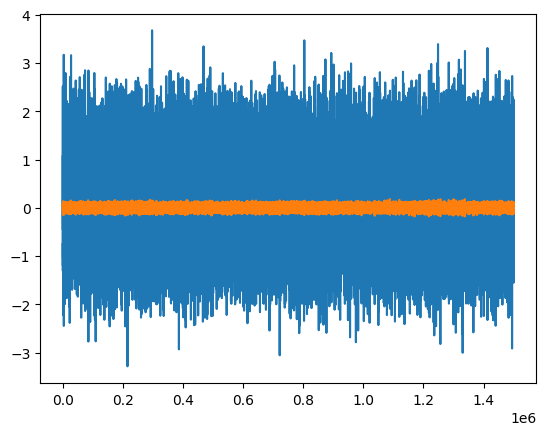

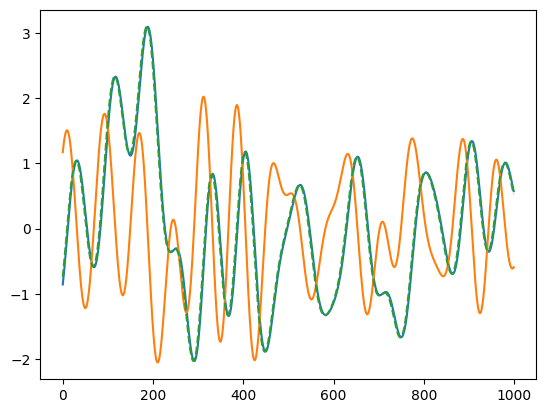

In [103]:
# plt.plot((y-np.mean(y))/np.std(y))

# plt.plot(u)
plt.plot(x)
plt.show()

plt.plot(((x-np.mean(x, axis=0))/np.std(x, axis=0))[:1000])
plt.plot(((u-np.mean(u, axis=0))/np.std(u, axis=0))[:1000],'--')
plt.show()

[Text(0.5, 0, 'sample [-]'), Text(0, 0.5, 'output $y_k$')]

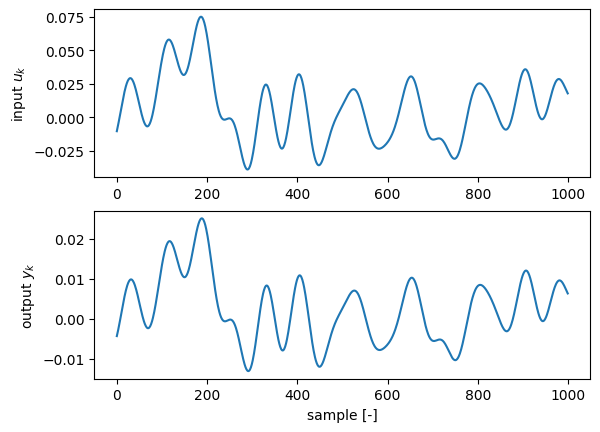

In [99]:
fig, axs = plt.subplots(2)
axs[0].plot(u[:1000])
axs[0].set( ylabel='input $u_k$')
axs[1].plot(y[:1000])
axs[1].set(xlabel='sample [-]', ylabel='output $y_k$')

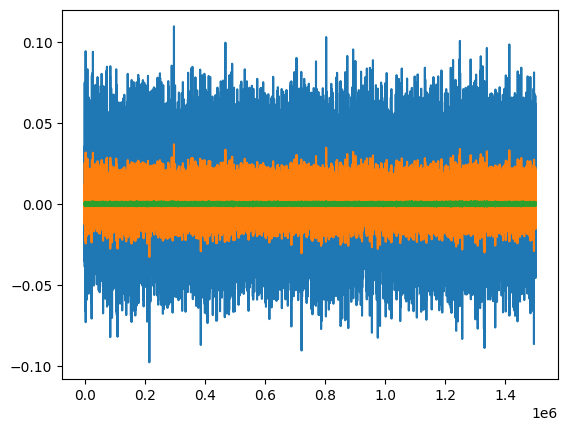

In [100]:
plt.plot(u)
plt.plot(x)

In [104]:
th = np.array([-0.1, 0.5, 0.1, -0.2])

th_mdic = {"th": th}
u_mdic = {"u": u}
x_mdic = {"x": x}
y_mdic = {"y": y}

savemat( "MSD1500k_coeff.mat", th_mdic)
savemat("MSD1500k_u_data.mat", u_mdic)
savemat("MSD1500k_x_data.mat", x_mdic)
savemat("MSD1500k_y_data.mat", y_mdic)